In [1]:
print('hello')

hello


In [1]:
# these are three data science libraries which are required to plot the data to find out the insights of data
#what type of data, based on i can apply the best fitted algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('iris.csv')

In [3]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
print(dataset.count())

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64


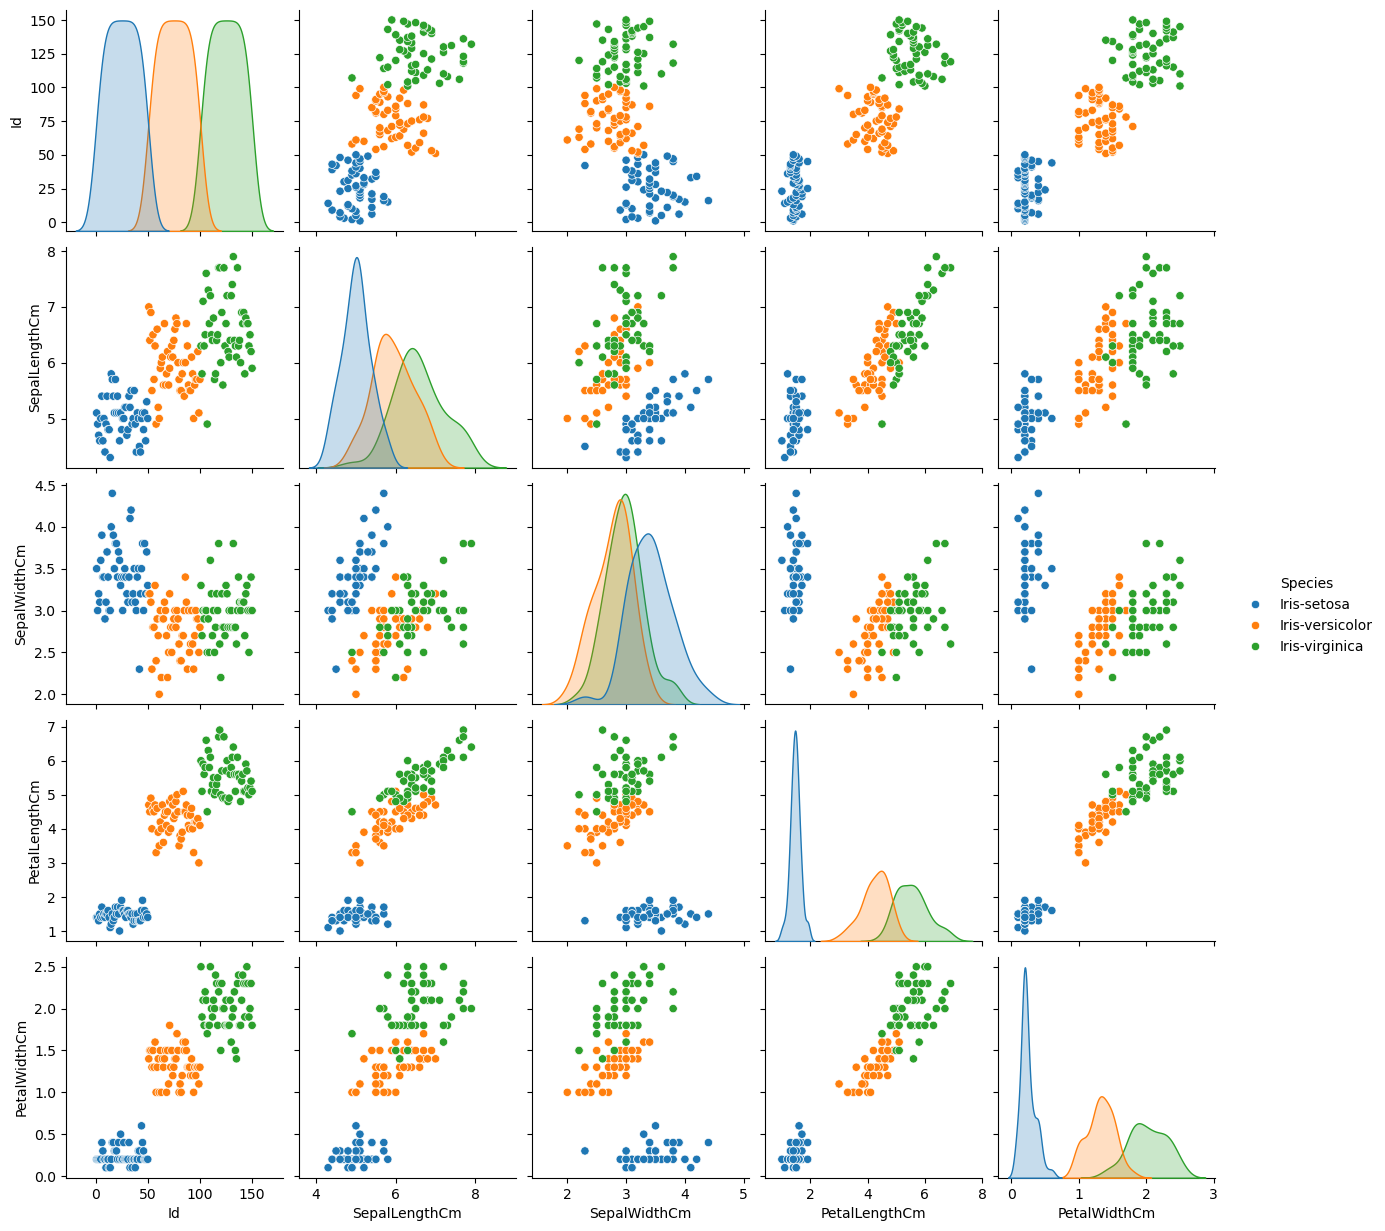

In [5]:
#pair plot
sns.pairplot(dataset, hue='Species')
plt.show()

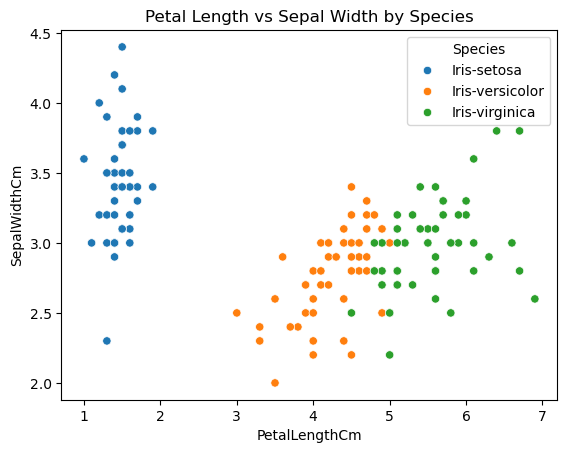

In [6]:
#scatter plot
sns.scatterplot(
    x='PetalLengthCm',
    y='SepalWidthCm',
    hue='Species',
    data=dataset
)
plt.title('Petal Length vs Sepal Width by Species')
plt.show()

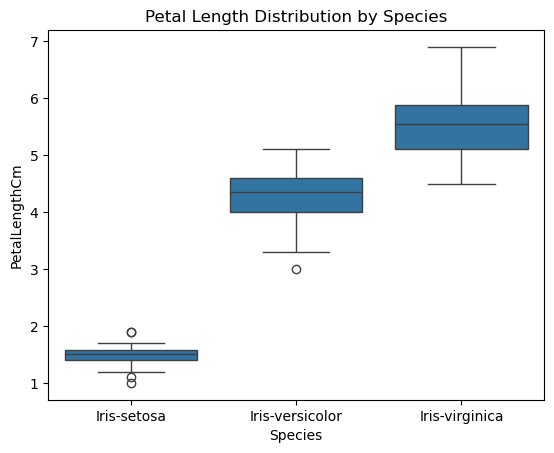

In [7]:
#boxplot
sns.boxplot(
    x='Species',
    y='PetalLengthCm',
    data=dataset
)
plt.title('Petal Length Distribution by Species')
plt.show()

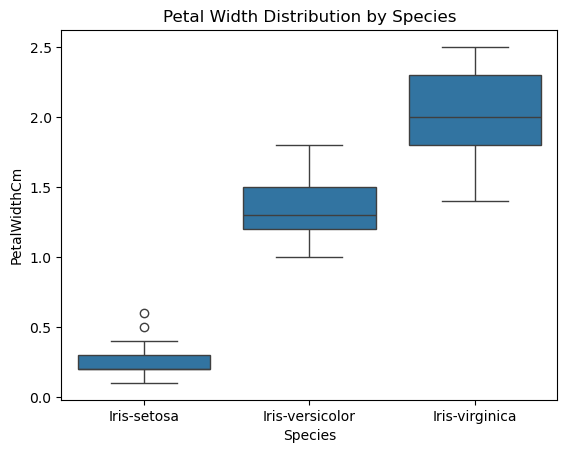

In [8]:
#boxplot
sns.boxplot(
    x='Species',
    y='PetalWidthCm',
    data=dataset
)
plt.title('Petal Width Distribution by Species')
plt.show()

In [3]:
# as machine don't understand words, we need to convert categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
dataset['Species_encoded'] = dataset['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})


#### dataset.head(5)

In [5]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#preparing inputs(x) and outputs(y)
x=dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values #input
y=dataset[['Species']].values   #output

In [7]:
# Logistic regression model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() #default initialization
log_reg.fit(x,y) # training the LR model
# Model Accuracy, how often is the classifier correct?
print("Logistic Regression model's Accuracy is:",log_reg.score(x, y))

Logistic Regression model's Accuracy is: 0.9733333333333334


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# train_test_split function is used to divide the dataset into training and testing in order to evaluate the model’s performance

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)


In [9]:
# Train with LR Classifer

log_reg = log_reg.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = log_reg.predict(x_test)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [10]:
# generate metrices
from sklearn import metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
# random forest model creation
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=80) #default initialization
rfc.fit(x,y) # training the RFC model
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier model's Accuracy is:",rfc.score(x, y))

Random Forest Classifier model's Accuracy is: 1.0


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
rfc = rfc.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = rfc.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [14]:
# generate metrices
from sklearn import metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [27]:
# take input for new flower's sepal length,width, petal length, width
s_l = float(input("Enter the value of Sepal Length in cm: "))
s_w  = float(input("Enter the value of Sepal Width in cm: "))
p_l = float(input("Enter the value of Petal Length in cm: "))
p_w  = float(input("Enter the value of Petal Width in cm: "))

new_flower_value = [[s_l, s_w, p_l, p_w]]

prediction = rfc.predict(new_flower_value)
print("Predicted name of new Flower Species:", prediction)




Enter the value of Sepal Length in cm:  5.3
Enter the value of Sepal Width in cm:  1.9
Enter the value of Petal Length in cm:  5.1
Enter the value of Petal Width in cm:  1.9


Predicted name of new Flower Species: ['Iris-virginica']


In [31]:
#KNN model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2) #default initialization
knn.fit(x,y) # training the KNN model
# Model Accuracy, how often is the classifier correct?
print("K nearest neighbor Classifier model's Accuracy is:",knn.score(x, y))

K nearest neighbor Classifier model's Accuracy is: 0.98


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [33]:
from sklearn.svm import SVC
svm= SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x,y)
print("Support vector machine Classifier model's Accuracy is:",svm.score(x, y))

Support vector machine Classifier model's Accuracy is: 0.9933333333333333


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


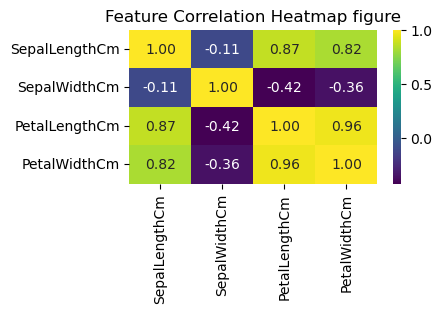

In [70]:
#Calculate the correlation matrix to measure how strongly features are related
plt.figure(figsize=(4,2))

correlation = dataset[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].corr()

sns.heatmap(correlation,annot=True, cmap='viridis', fmt='.2f')

plt.title("Feature Correlation Heatmap figure")
plt.show()